# MNIST handwritten digits recognition

Let's start loading the mnist dataset with mnist_loader.py:

In [1]:
%matplotlib inline
# import Nielsen's MIST loader functions
import mnist_loader
# split and store MIST dataset in training, validation and test data
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)

In [ ]:
# get more infos about Nielsen's "mnist_loader.load_data_wrapper" function
?? mnist_loader.load_data_wrapper()

Let's inspect the first examples...

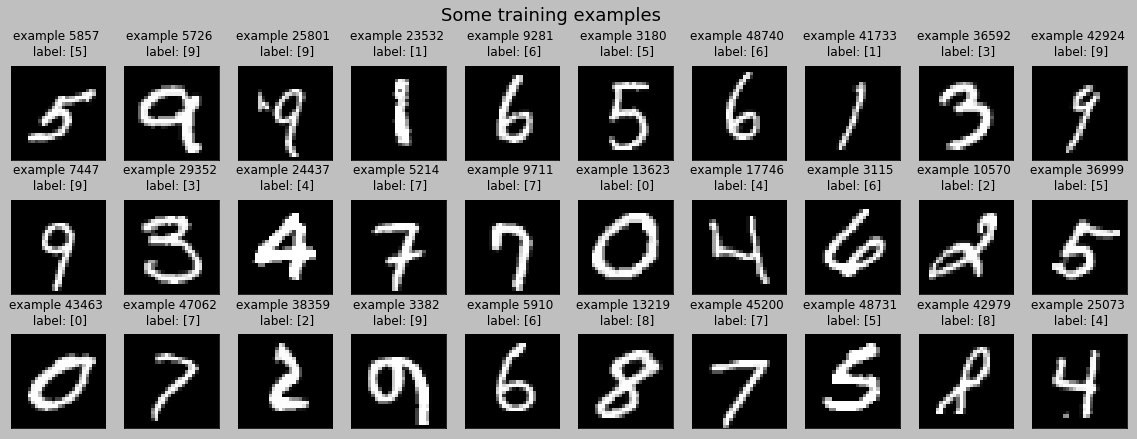

In [2]:
# import libraries needed for plotting some examples
import numpy as np
import matplotlib.pyplot as plt
import random
# plot some training examples along with their label
plt.style.use('grayscale')
num_columns = 10
num_rows = 3
fig, axes = plt.subplots(num_rows, 10, figsize=(20, 2.33 * num_rows))
choosen_ineces=random.sample(range(1, len(training_data)), num_columns*num_rows)
for i, ax in zip(choosen_ineces, axes.ravel()):
     label,junk = np.where(training_data[i][1] == 1)
     ax.matshow(np.reshape(training_data[i][0], (28, 28))) 
     ax.set_xticks(())
     ax.set_yticks(())
     ax.set_title('example '+str(i)+' \n label: '+str(label))
fig.suptitle("Some training examples", fontsize=18)
plt.show()

Running the first version of the network ( simplest one ... ADD EXPLAINATION FROM BOOK)

![img](https://www.tensorflow.org/versions/r0.11/images/MNIST-Matrix.png)

Epoch 0 : 9037 / 10000
Epoch 1 : 9185 / 10000
Epoch 2 : 9267 / 10000
Epoch 3 : 9321 / 10000
Epoch 4 : 9306 / 10000
Epoch 5 : 9348 / 10000
Epoch 6 : 9424 / 10000
Epoch 7 : 9431 / 10000
Epoch 8 : 9431 / 10000
Epoch 9 : 9460 / 10000
Epoch 10 : 9450 / 10000
Epoch 11 : 9441 / 10000
Epoch 12 : 9473 / 10000
Epoch 13 : 9472 / 10000
Epoch 14 : 9465 / 10000
Epoch 15 : 9493 / 10000
Epoch 16 : 9511 / 10000
Epoch 17 : 9505 / 10000
Epoch 18 : 9518 / 10000
Epoch 19 : 9525 / 10000
Epoch 20 : 9499 / 10000
Epoch 21 : 9494 / 10000
Epoch 22 : 9523 / 10000
Epoch 23 : 9513 / 10000
Epoch 24 : 9494 / 10000
Epoch 25 : 9531 / 10000
Epoch 26 : 9516 / 10000
Epoch 27 : 9523 / 10000
Epoch 28 : 9536 / 10000
Epoch 29 : 9513 / 10000
Epoch 30 : 9524 / 10000
Epoch 31 : 9531 / 10000
Epoch 32 : 9542 / 10000
Epoch 33 : 9531 / 10000
Epoch 34 : 9533 / 10000
Epoch 35 : 9516 / 10000
Epoch 36 : 9535 / 10000
Epoch 37 : 9527 / 10000
Epoch 38 : 9517 / 10000
Epoch 39 : 9533 / 10000
Epoch 40 : 9534 / 10000
Epoch 41 : 9534 / 10000
Ep

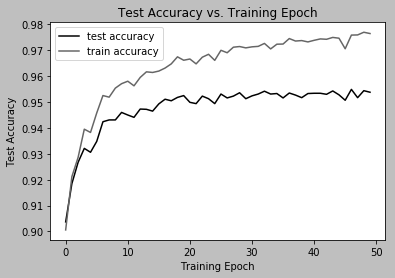

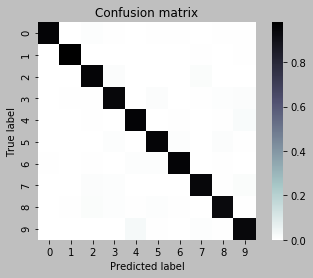

In [3]:
# import Nielsen's network functions
import network
# initialize fully connected network with 3 layers (784 input, 30 hidden, 10 output neurons)
net = network.Network([784, 30, 10])
# train it with SGD for 30 epochs (mini batch size of 10 and eta=3) and otput diagnostic plots
net.SGD(training_data, 50, 10, 3.0, test_data=test_data, diagnostic_plots=True)

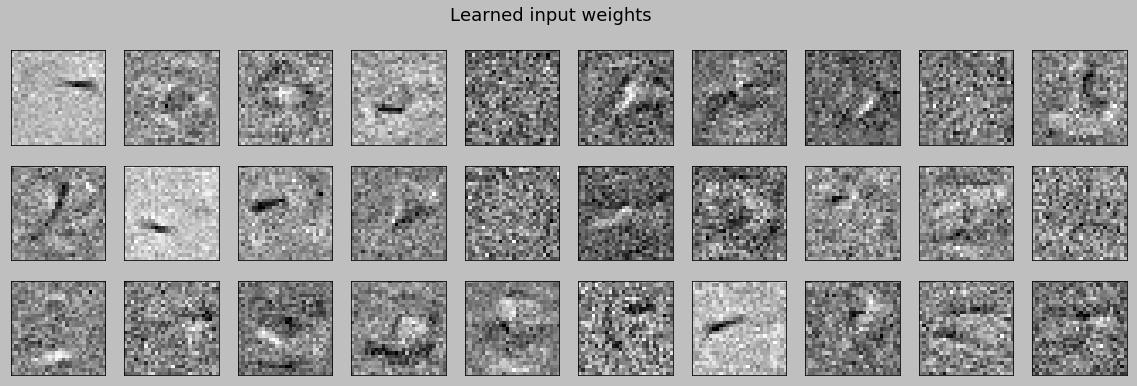

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# visualized learned input weights
input_weights=[net.weights[0][i,:] for i in range(30)]
num_nodes = np.shape(net.weights[0])[0]
num_rows = int(math.ceil(num_nodes / 10.0))
fig, axes = plt.subplots(num_rows, 10, figsize=(20, 2 * num_rows))
for coefs, ax in zip(input_weights, axes.ravel()):
     ax.matshow(coefs.reshape(28, 28))
     ax.set_xticks(())
     ax.set_yticks(())
fig.suptitle("Learned input weights", fontsize=18)
plt.show()

In [ ]:
# IRRISOLTO ----> LOG COLORMAP LABELS FOR CONFUSION MATRIX

# IDEA ----> VISUALIZZA PESI HIDDEN TO OUTPUT COME MEDIA PESATA FILTRI DI INPUT (?)

# STILL TO BE DONE ----> 
# 1) AGGIUSTA SIZE E POSIZIONE PLOT CONFUSION MATRIX E LAERNING CURVES
# 2) AGGIUNGI LOSS A LEARNING CURVE 
# 3) MOSTRA RANDOM EXAMPLES DI COORECT/INCORRECT CLASSIFICATION

# logaritmic colormap
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.colors
# import seaborn as sns
# import math

# A = np.random.rand(50,50)*0.1+0.9*np.eye(50,50)
# # plt.imshow(A, norm=matplotlib.colors.LogNorm())
# # plt.show()
# cbar_ticks = [i for i in range(math.floor(math.log10(A.min().min())), math.ceil(math.log10(A.max().max())))]
# print(cbar_ticks)
# ax = sns.heatmap(A, cmap="bone_r",norm=matplotlib.colors.LogNorm(),cbar_kws={"ticks": cbar_ticks})
# ax.set_aspect(1)
# plt.title("Confusion matrix")
# plt.ylabel("True label")
# plt.xlabel("Predicted label")
# plt.show()

(add examples results visualization HERE) (+ t-snee, leaning curves, errors?)

In [5]:
# perform t-snee with Sklearn (taken from https://github.com/oreillymedia/t-SNE-tutorial)
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
digits.data.shape
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
X_embedded=TSNE(n_components=2).fit_transform(X)
print(X.shape)
print(y.shape)
print(X_embedded.shape)
print(y)

(1797, 64)
(1797,)
(1797, 2)
[0 0 0 ... 9 9 9]


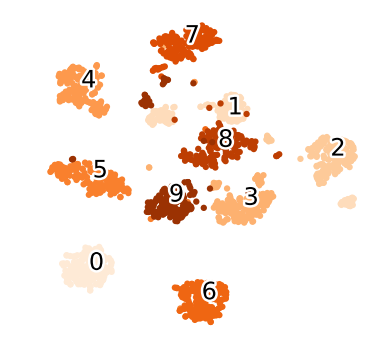

In [6]:
# visulize digit's 2D embedding
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
import seaborn as sns

def scatter(x, colors):
    # We choose a color palette with sns.cubehelix_palette(8))
    palette = np.array(sns.color_palette("Oranges", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(6, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    f.patch.set_facecolor('xkcd:white')
    ax.axis('off')
    ax.axis('tight')
    
    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

scatter(X_embedded, y);
# RIFAI SU DIGITS 32*32 grezzi e su attivazioni ---> CREA METODO PER TIRARE FUORI RAPPRESENTAZIONE HIDDEN LAYER

Let's run SGD to train the second version of our network (cross entropy, etc... EXPLAIN)

In [ ]:
import network2
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
#net.large_weight_initializer()
net.SGD(training_data, 30, 10, 0.1, lmbda = 5.0,evaluation_data=validation_data,
    monitor_evaluation_accuracy=True)

(add examples results visualization HERE) (+ t-snee, leaning curves, errors?)

# Keras

In [5]:
from tensorflow.keras import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# import needed third party libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# import needed Nielsen's MIST loader functions
from mnist_loader import load_data

def load_data_wrapper_conv():
    tr_d, va_d, te_d = load_data()
    
    # as in the previous case create a list of images and labels
    training_data = [np.reshape(x, (28,28)) for x in tr_d[0]]
    training_lablels = [y for y in tr_d[1]]
    # stack images in a 3D array
    training_data = np.dstack(training_data)
    # reorder it to be dim=(example number, height, width)
    training_data = np.rollaxis(training_data,-1)
    # stack labels a 1D array
    training_labels = np.dstack(training_lablels)
    # reorder it to be dim=(example number)
    training_labels = np.squeeze(training_labels)
    
    # as in the previous case create a list of images and labels
    test_data = [np.reshape(x, (28,28)) for x in te_d[0]]
    test_lablels = [y for y in te_d[1]]
    # stack images in a 3D array
    test_data = np.dstack(test_data)
    # reorder it to be dim=(example number, height, width)
    test_data = np.rollaxis(test_data,-1)
    # stack labels a 1D array
    test_labels = np.dstack(test_lablels)
    # reorder it to be dim=(example number)
    test_labels = np.squeeze(test_labels)
    
    return (training_data, training_labels, test_data, test_labels)

training_data, training_labels, test_data, test_labels = load_data_wrapper_conv()

print(np.shape(training_data))
print(np.shape(training_labels))
print(type(training_data))
print(type(training_labels))
print(np.shape(test_data))
print(np.shape(test_labels))
print(type(test_data))
print(type(test_labels))

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [ ]:
train_labels=training_labels
train_features=training_data
test_labels=test_labels
test_features=test_data
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"%train_features.shape[1])
print("Image columns: %d"%train_features.shape[2])
print("Number of classes: %d"%num_classes)
train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
print(np.shape(train_features))
print(np.shape(train_labels))
print(type(train_features))
print(type(train_labels))
print(np.shape(test_features))
print(np.shape(test_labels))
print(type(test_features))
print(type(test_labels))

In [ ]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28))) 
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(num_classes))
model1.add(Activation("softmax"))

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model1_info = model1.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=2, verbose=1, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model1_info)
print("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

# Tensorflow

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
?? input_data.read_data_sets
#mnist = input_data.read_data_sets(folder_path, one_hot=True)

ModuleNotFoundError: No module named 'tensorflow'